<a href="https://colab.research.google.com/github/sarahethompson/eportfolio/blob/main/artefacts/module-3/unit-9-CNN-model-activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNN) - Object Recognition

# Imports

In [2]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow
tensorflow.random.set_seed(112)

### Imports
Importing necessary libraries for numerical operations, plotting, deep learning with TensorFlow and Keras, and evaluating the model.

In [3]:
import os
import numpy as np
import itertools

import tensorflow as tf
import keras
from keras.datasets import cifar10 # importing the dataset

from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.metrics import confusion_matrix

# To Explore the images
from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd

We are using Tensorflow to power Keras

# Get the Dataset

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The dataset is popularly used to train image classification models

In [5]:
# Getting the dataset as a Tuple

(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


# Constants

In [6]:
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Exploring the Data

Lets look at the first image in the dataset

In [7]:
x_train_all.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
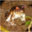

In [8]:
x_train_all[0]

In [9]:
x_train_all[0].shape

(32, 32, 3)

#### Using ipython to display the image

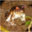

In [10]:
# To use the ipython display to view an image

pic = array_to_img(x_train_all[0])
display(pic)

#### Using Matplotlib to view the image

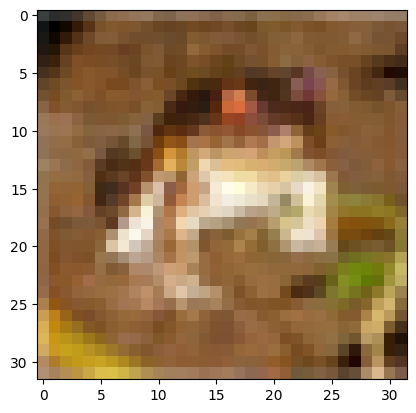

In [11]:
plt.imshow(x_train_all[0])


In [12]:
# To check the label
y_train_all.shape

(50000, 1)

In [13]:
# Note that in the image above the index 1 corresponds to "Automobile"
# we have a 2 dimension numpy array; that is why we also include " [0] "

y_train_all[0][0]

np.uint8(6)

In [14]:
# Using the lable names to get the actual names of classes

LABEL_NAMES[y_train_all[0][0]]

'frog'

### The shape of the image
    * 32, 32 is the weight and the height
    * 3 is the number of channels (These are the number of colors): Red, Green & Blue (RGB)
    
 * x_train_all.shape  >>> (50000, 32, 32, 3)
     * this means we have 50,000 entries | then 32x32  weight and height| 3 colors (RGB)

In [15]:
x_train_all.shape

(50000, 32, 32, 3)

In [16]:
number_of_images, x, y, c = x_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [17]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

#### * We need to preprocess our data so that it is easier to feed it to our neural network.


### Scalling both x_train and test


In [18]:
x_train_all =x_train_all / 255.0

In [19]:
x_test =  x_test / 255.0

In [20]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Creating categorical encoding for the "y " data

In [21]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
y_cat_train_all = to_categorical(y_train_all,10)

In [22]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
y_cat_test = to_categorical(y_test,10)

In [23]:
y_cat_train_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Creating the Validation dataset

For small data we usually go with:
    * 60% for Training
    * 20% Validation
    * 20% Testing
    
Only the final selected model gets to see the testing data. This helps us to ensure that we have close to real data in real-world when the model is deployed. Only our best model gets to see our testing dataset. Because it will give us a realistic impression of how our model will do in the real world
___

However, if the dataset is enormous.:
    * 1% for is used for validation
    * 1% for is used for testing

In [24]:
VALIDATION_SIZE = 10000

In [25]:
# VALIDATION_SIZE = 10,000 as defined above

x_val = x_train_all[:VALIDATION_SIZE]
y_val_cat = y_cat_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 32, 32, 3)

In [26]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<b>NEXT:</b>
* We Create two NumPy arrays x_train and y_train that have the shape(40000, 3072) and (40000,1) respectively.
* They will contain the last 40000 values from x_train_all and y_train_all respectively

In [27]:
x_train = x_train_all[VALIDATION_SIZE:]
y_cat_train= y_cat_train_all[VALIDATION_SIZE:]

In [28]:
x_train.shape

(40000, 32, 32, 3)

In [29]:
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])


 ## NOTE:
 <h4>* <em>FILTERS: </em>
    Typical values for the number of filters can be determined by the data set's complexity. So essentially the larger the images, the more variety and the more classes you're trying to classify then the more filters you should have.</h4>
   <h4> * Most times people typically pick filter based on powers of 2, for example, 32. However, if you have more complex data like road signs etc. you should be starting with a higher filter value</h4>
   <h4>The default STRIDE value is 1 x 1 pixel</h4>

# BUILDING THE MODEL

In [30]:
model = Sequential()

## ************* FIRST SET OF LAYERS *************************

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## *************** SECOND SET OF LAYERS ***********************
#Since the shape of the data is 32 x 32 x 3 =3072 ...
#We need to deal with this more complex structure by adding yet another convolutional layer

# *************CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

### Adding Early stopping

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
history = model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3619 - loss: 1.7423 - val_accuracy: 0.5323 - val_loss: 1.2963
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5491 - loss: 1.2690 - val_accuracy: 0.5915 - val_loss: 1.1587
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6164 - loss: 1.0943 - val_accuracy: 0.6107 - val_loss: 1.1127
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6618 - loss: 0.9712 - val_accuracy: 0.6294 - val_loss: 1.0753
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6955 - loss: 0.8718 - val_accuracy: 0.6383 - val_loss: 1.0661
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7288 - loss: 0.7850 - val_accuracy: 0.6478 - val_loss: 1.0604
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7558 - loss: 0.7106 - val_accuracy: 0.6479 - val_loss: 1.1086
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7778 - loss: 0.6423 -

In [35]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
metrics = pd.DataFrame(model.history.history)

In [37]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.442900,1.536026,0.5323,1.296286
1,0.569800,1.217456,0.5915,1.158672
2,0.629225,1.060847,0.6107,1.112687
3,0.669925,0.947158,0.6294,1.075281
4,0.702725,0.851147,0.6383,1.066133
5,0.735200,0.764109,0.6478,1.060360
6,0.762325,0.687377,0.6479,1.108646
7,0.786050,0.619790,0.6413,1.166915


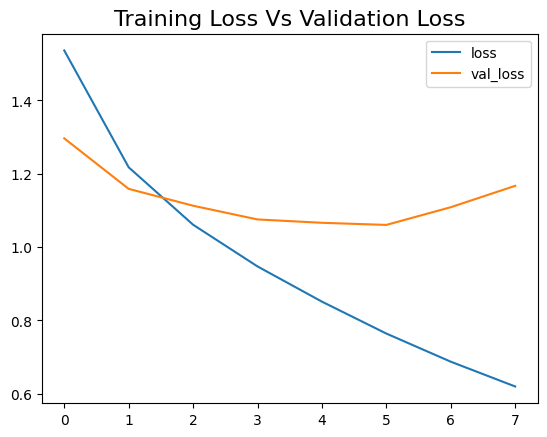

In [38]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

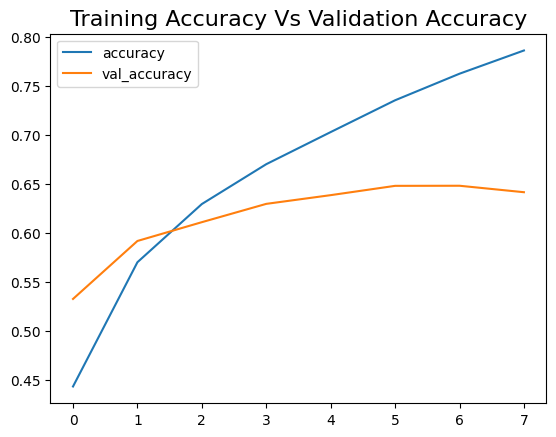

In [39]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Validating on Test Data

In [40]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6454 - loss: 1.1567


[1.1578543186187744, 0.6432999968528748]

## Classification Report and Confusion Matrix

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
#predictions = model.predict_classes(x_test)
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1000
           1       0.69      0.85      0.76      1000
           2       0.52      0.54      0.53      1000
           3       0.40      0.57      0.48      1000
           4       0.62      0.53      0.57      1000
           5       0.55      0.48      0.51      1000
           6       0.75      0.69      0.72      1000
           7       0.77      0.63      0.69      1000
           8       0.78      0.74      0.76      1000
           9       0.74      0.71      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.65     10000
weighted avg       0.66      0.64      0.65     10000



In [44]:
confusion_matrix(y_test,predictions)

array([[676,  68,  51,  31,  17,  10,  12,  11,  73,  51],
       [ 13, 851,   8,  12,   1,   6,  15,   1,  28,  65],
       [ 66,  18, 542, 120,  91,  45,  63,  19,  21,  15],
       [  8,  27,  84, 575,  64, 135,  48,  28,  16,  15],
       [ 29,  12, 105, 137, 530,  47,  61,  60,  11,   8],
       [ 10,  17,  96, 281,  41, 480,  17,  41,  10,   7],
       [  3,  21,  58, 125,  34,  47, 693,   7,   8,   4],
       [ 20,  15,  70,  77,  74,  69,   7, 632,   5,  31],
       [ 81,  54,  16,  30,   7,  13,   6,   3, 741,  49],
       [ 14, 149,  16,  33,   1,  19,   3,  19,  33, 713]])

# Predicting on single image

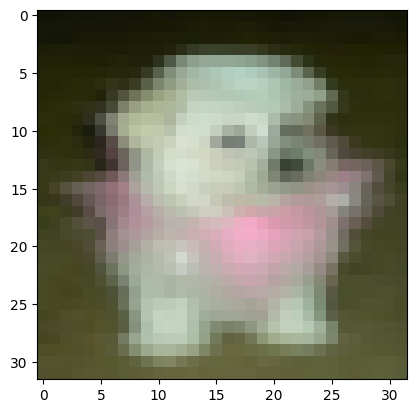

In [66]:
plt.imshow(x_test[3000])

In [67]:
my_image = x_test[3000]

In [68]:
# SHAPE --> (num_images,width,height,color_channels)
# model.predict_classes(my_image.reshape(1,32,32,3))
predictions = np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[5]


In [69]:
LABEL_NAMES[y_test[3000][0]]

'dog'

## Notes


*   **CIFAR-10 Dataset:** We are using the CIFAR-10 dataset, a standard benchmark for object recognition with 60,000 32x32 color images across 10 classes. Keras's `cifar10.load_data()` function automatically splits it into training (50,000 images) and testing (10,000 images) sets.
*   **Keras and TensorFlow:** Keras is a high-level API for building deep learning models, running on backends like TensorFlow. TensorFlow is the underlying library providing low-level operations. Keras simplifies model building.
*   **Data Roles (x and y):** `x` represents the input data (the images), and `y` represents the output data (the labels or correct classes).
*   **Image Size Consistency:** Neural networks typically require consistent input image sizes. The CIFAR-10 dataset provides this, but for other datasets, preprocessing like resizing or padding would be needed.
*   **Data Preprocessing:**
    *   **Scaling:** Pixel values are scaled from [0, 255] to [0.0, 1.0] by dividing by 255.0 to help model training.
    *   **One-Hot Encoding:** Integer labels are converted into a binary vector format (e.g., `[0., 0., 0., 1., 0., ...]`) using `to_categorical` for use with categorical crossentropy loss.
*   **Validation Set:** A portion of the original training data (10,000 images in this case) is split off to create a validation set. This set is used during training to monitor performance and prevent overfitting, distinct from the final test set.
*   **CNN Architecture:**
    *   **Filters (Kernels):** Small matrices that slide over the image to detect features like edges and textures. The number of filters is a hyperparameter.
    *   **Convolutional Layers (`Conv2D`):** Apply filters to the input.
    *   **Pooling Layers (`MaxPool2D`):** Reduce spatial dimensions and computational cost, providing some spatial invariance.
    *   **Flatten Layer:** Reshapes the output of convolutional/pooling layers into a 1D vector.
    *   **Dense (Fully Connected) Layers:** Standard ANN layers that take the flattened features for final classification.
*   **Model Building in Keras:** Models can be built using `Sequential` (linear stack), Functional API (flexible connections), or Model Subclassing (custom models).
*   **Training Process:**
    *   **Supervised Learning:** CNNs for classification are supervised models, requiring labeled data for training.
    *   **Backpropagation and Gradient Descent:** These are the core algorithms used to train CNNs by adjusting weights to minimize the loss function.
    *   **Optimizer (Adam):** An algorithm (like Adam) that implements gradient descent to update model parameters.
    *   **Loss Function (Categorical Crossentropy):** Measures the difference between predicted probabilities and true one-hot encoded labels.
    *   **Metrics (Accuracy):** Measures the proportion of correct predictions.
*   **Early Stopping:** A callback (`EarlyStopping`) used during training to monitor a metric (like `val_loss`) and stop training early if it doesn't improve for a set number of epochs (`patience`) to prevent overfitting.
*   **Evaluation:**
    *   **`model.evaluate()`:** Calculates the loss and metrics (like accuracy) on a given dataset (e.g., the test set).
    *   **`model.predict()`:** Generates the raw output (e.g., class probabilities) for each input in a dataset. `np.argmax` is used to get the final predicted class label from the probabilities.
    *   **Test Set Usage:** The test set is used only *once* at the end for an unbiased evaluation of the final model. Test accuracy is typically lower than training accuracy.
*   **Performance Metrics:**
    *   **Classification Report:** Provides per-class metrics like precision, recall, and f1-score.
    *   **Confusion Matrix:** A table showing the counts of correct and incorrect predictions for each class.
*   **Predicting on a Single Image:** To predict on a single image, it needs to be reshaped to match the model's expected input shape, including the batch size dimension (e.g., `(1, 32, 32, 3)`).